In [1]:
import warnings

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
print(X_train.shape, X_test.shape)

(21000, 784) (49000, 784)


In [4]:
mlp = MLPClassifier(
    hidden_layer_sizes=(256,128,),
    max_iter=100,
    learning_rate_init=0.001,
    learning_rate='constant',
    batch_size=256,
    verbose=True,
    random_state=42,
    activation='relu',
)

In [5]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.55023009
Iteration 2, loss = 0.20717752
Iteration 3, loss = 0.14594798
Iteration 4, loss = 0.10893824
Iteration 5, loss = 0.10914021
Iteration 6, loss = 0.06511461
Iteration 7, loss = 0.05301479
Iteration 8, loss = 0.04043422
Iteration 9, loss = 0.03303779
Iteration 10, loss = 0.02379861
Iteration 11, loss = 0.02446882
Iteration 12, loss = 0.01645604
Iteration 13, loss = 0.01134230
Iteration 14, loss = 0.00800287
Iteration 15, loss = 0.00643594
Iteration 16, loss = 0.00573374
Iteration 17, loss = 0.00384974
Iteration 18, loss = 0.00303289
Iteration 19, loss = 0.00287951
Iteration 20, loss = 0.00225999
Iteration 21, loss = 0.00188948
Iteration 22, loss = 0.00165306
Iteration 23, loss = 0.00148218
Iteration 24, loss = 0.00133431
Iteration 25, loss = 0.00118565
Iteration 26, loss = 0.00107245
Iteration 27, loss = 0.00099328
Iteration 28, loss = 0.00097474
Iteration 29, loss = 0.00084957
Iteration 30, loss = 0.00077983
Iteration 31, loss = 0.00072194
Iteration 32, los

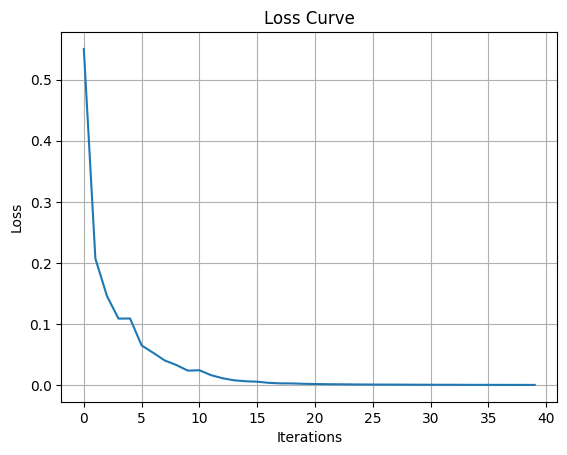

In [7]:
# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()